# Will be focusing on pytorch before moving ahead

In [5]:
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 38.5 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 46.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [matplotlib]5 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = torch.randn(5, 5)  # Regular tensor

class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(5, 5))  # nn.Parameter

In [3]:
import torch.optim as optim
model = Model2()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [4]:
x = torch.randn(5, 5, requires_grad=True)
y = x * 2
z = y.sum()

z.backward()
print(x.grad)  # Will this be None or a tensor?

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])


✅ Chart saved as 'pytorch_engineering_overview.png'


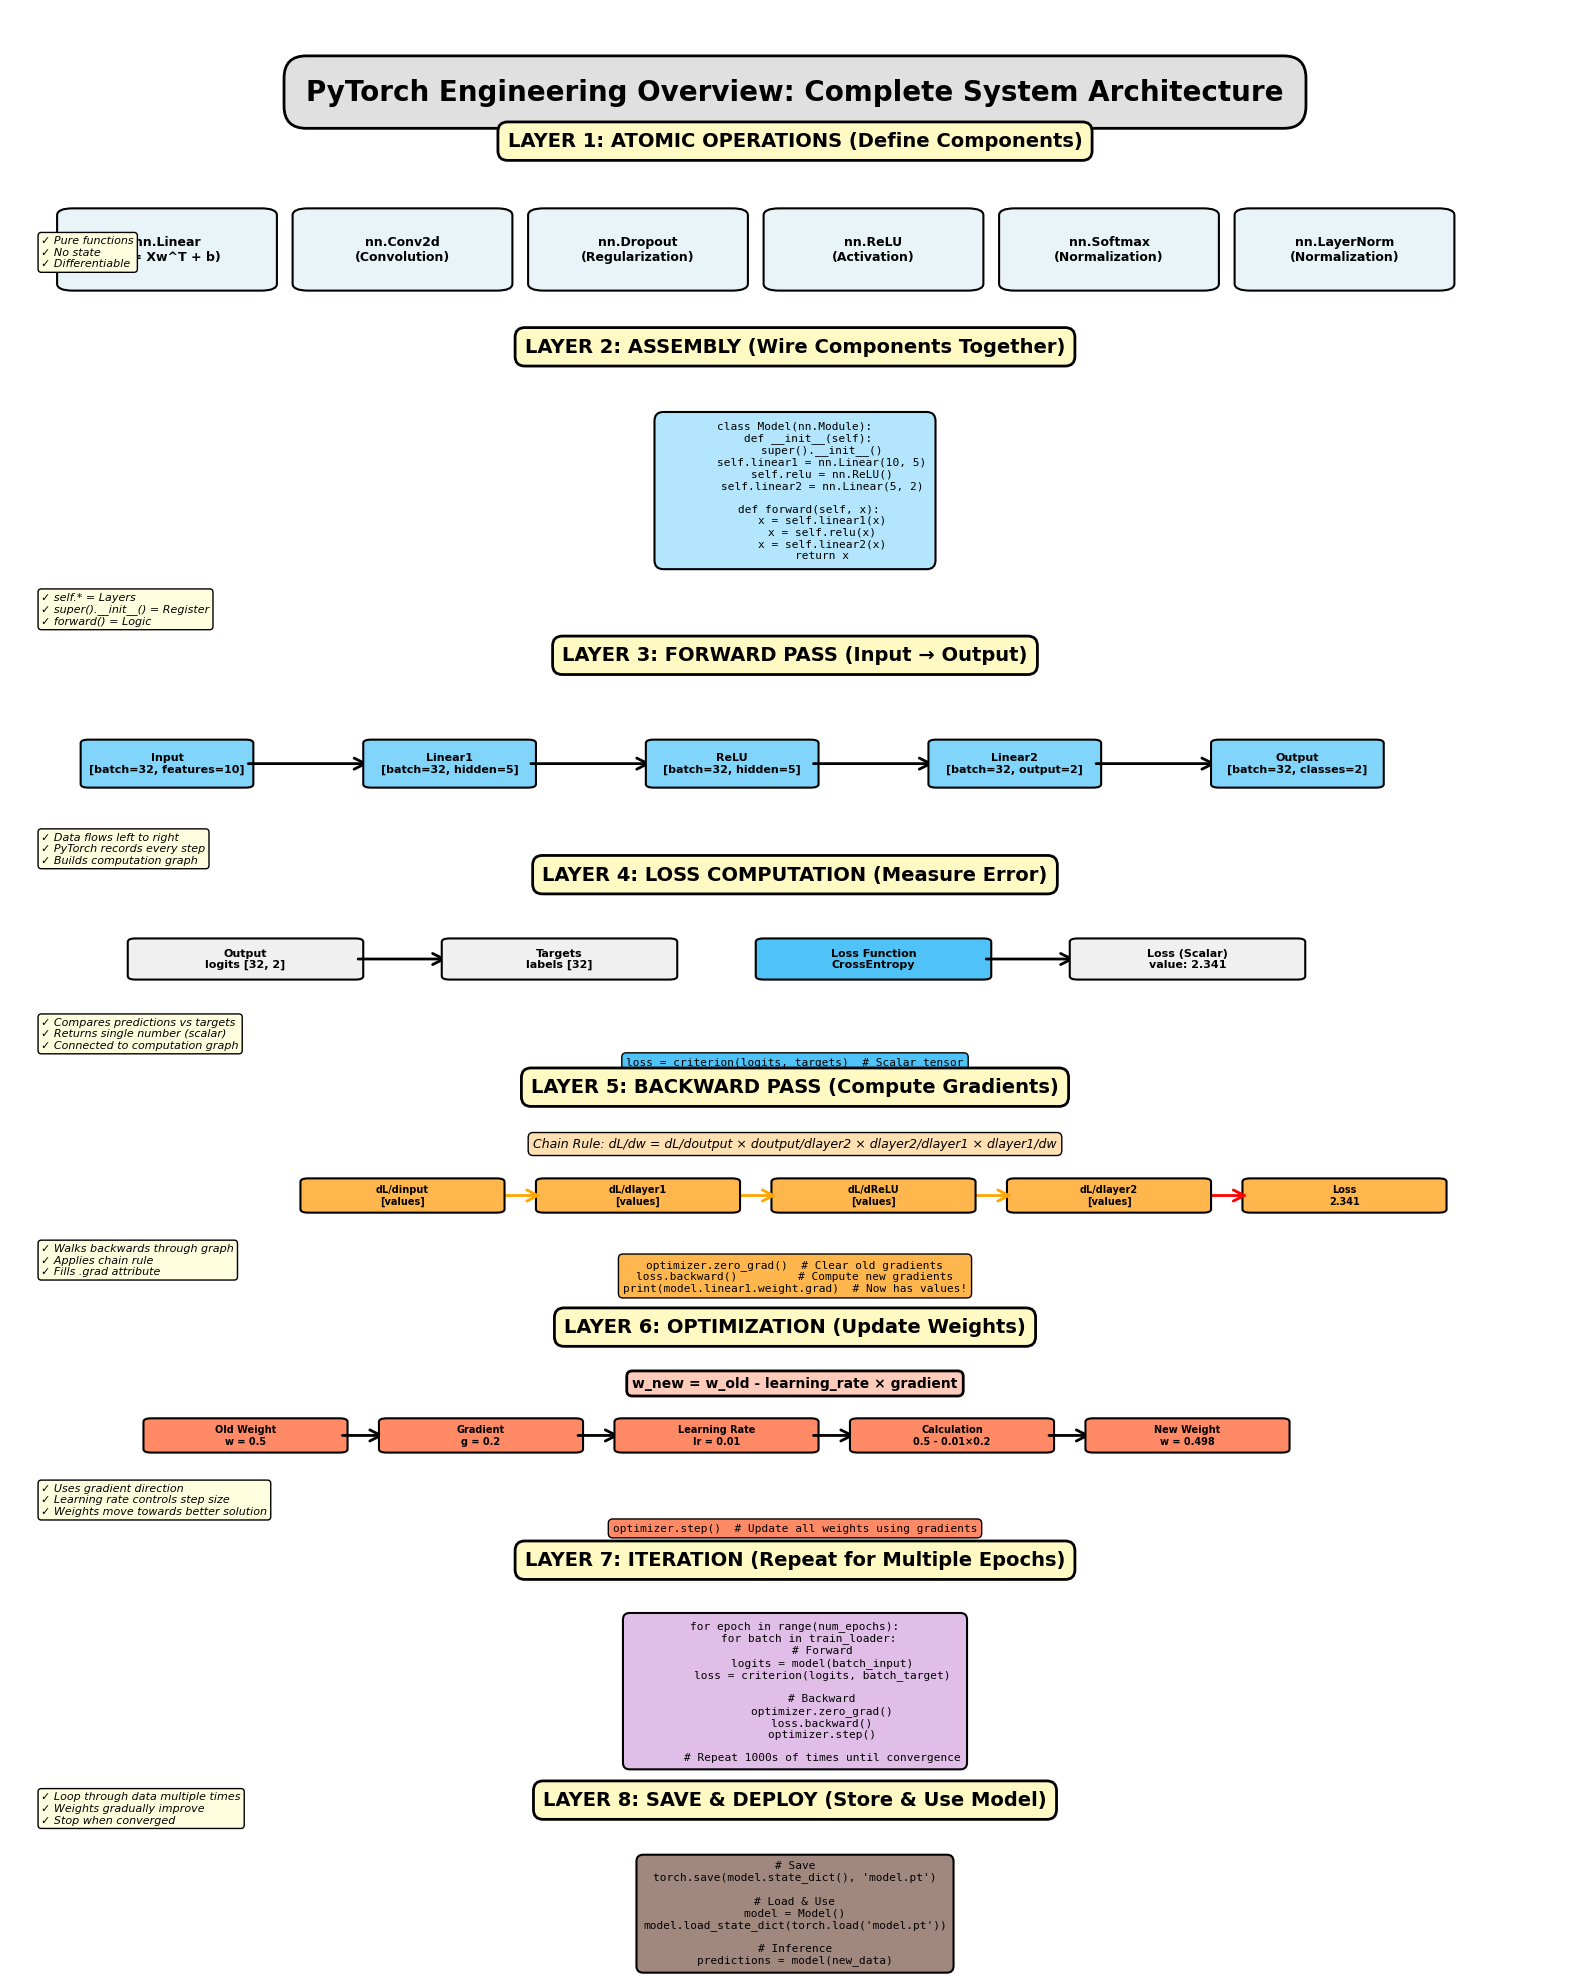

In [6]:
"""
PyTorch Engineering Overview Chart
Complete system architecture for ALL neural networks
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

fig, ax = plt.subplots(figsize=(16, 20))
ax.set_xlim(0, 10)
ax.set_ylim(0, 28)
ax.axis('off')

# Color scheme
color_definition = '#E8F4F8'
color_assembly = '#B3E5FC'
color_forward = '#81D4FA'
color_loss = '#4FC3F7'
color_backward = '#FFB74D'
color_optimize = '#FF8A65'
color_save = '#A1887F'
color_theory = '#C8E6C9'

# ============================================
# TITLE
# ============================================
ax.text(5, 27, 'PyTorch Engineering Overview: Complete System Architecture', 
        fontsize=20, weight='bold', ha='center', va='top',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='#E0E0E0', edgecolor='black', linewidth=2))

# ============================================
# LAYER 1: ATOMIC OPERATIONS (Components)
# ============================================
y_start = 25.5

ax.text(5, y_start + 0.5, 'LAYER 1: ATOMIC OPERATIONS (Define Components)', 
        fontsize=14, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9C4', edgecolor='black', linewidth=2))

components = [
    ('nn.Linear\n(y = Xw^T + b)', 1),
    ('nn.Conv2d\n(Convolution)', 2.5),
    ('nn.Dropout\n(Regularization)', 4),
    ('nn.ReLU\n(Activation)', 5.5),
    ('nn.Softmax\n(Normalization)', 7),
    ('nn.LayerNorm\n(Normalization)', 8.5)
]

for label, x in components:
    box = FancyBboxPatch((x-0.6, y_start-1.5), 1.2, 1, 
                         boxstyle="round,pad=0.1", 
                         edgecolor='black', facecolor=color_definition, linewidth=1.5)
    ax.add_patch(box)
    ax.text(x, y_start-1, label, fontsize=9, ha='center', va='center', weight='bold')

ax.text(0.2, y_start-0.8, '✓ Pure functions\n✓ No state\n✓ Differentiable',
        fontsize=8, va='top', style='italic', bbox=dict(boxstyle='round', facecolor='lightyellow'))

# ============================================
# LAYER 2: ASSEMBLY (nn.Module)
# ============================================
y_start = 22

ax.text(5, y_start + 1, 'LAYER 2: ASSEMBLY (Wire Components Together)', 
        fontsize=14, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9C4', edgecolor='black', linewidth=2))

code_assembly = """class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(10, 5)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(5, 2)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x"""

ax.text(5, y_start, code_assembly, fontsize=8, ha='center', va='top', family='monospace',
        bbox=dict(boxstyle='round,pad=0.8', facecolor=color_assembly, edgecolor='black', linewidth=1.5))

ax.text(0.2, y_start-2.5, '✓ self.* = Layers\n✓ super().__init__() = Register\n✓ forward() = Logic',
        fontsize=8, va='top', style='italic', bbox=dict(boxstyle='round', facecolor='lightyellow'))

# ============================================
# LAYER 3: FORWARD PASS
# ============================================
y_start = 17.5

ax.text(5, y_start + 1, 'LAYER 3: FORWARD PASS (Input → Output)', 
        fontsize=14, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9C4', edgecolor='black', linewidth=2))

forward_steps = [
    ('Input\n[batch=32, features=10]', 1),
    ('Linear1\n[batch=32, hidden=5]', 2.8),
    ('ReLU\n[batch=32, hidden=5]', 4.6),
    ('Linear2\n[batch=32, output=2]', 6.4),
    ('Output\n[batch=32, classes=2]', 8.2)
]

for i, (label, x) in enumerate(forward_steps):
    box = FancyBboxPatch((x-0.5, y_start-0.8), 1, 0.6, 
                         boxstyle="round,pad=0.05", 
                         edgecolor='black', facecolor=color_forward, linewidth=1.5)
    ax.add_patch(box)
    ax.text(x, y_start-0.5, label, fontsize=8, ha='center', va='center', weight='bold')
    
    if i < len(forward_steps) - 1:
        arrow = FancyArrowPatch((x+0.5, y_start-0.5), (forward_steps[i+1][1]-0.5, y_start-0.5),
                               arrowstyle='->', mutation_scale=20, linewidth=2, color='black')
        ax.add_patch(arrow)

ax.text(0.2, y_start-1.5, '✓ Data flows left to right\n✓ PyTorch records every step\n✓ Builds computation graph',
        fontsize=8, va='top', style='italic', bbox=dict(boxstyle='round', facecolor='lightyellow'))

code_forward = "logits = model(input_data)  # Shape: [32, 2]"
ax.text(5, y_start-2.2, code_forward, fontsize=8, ha='center', family='monospace',
        bbox=dict(boxstyle='round,pad=0.4', facecolor=color_forward, edgecolor='black', linewidth=1))

# ============================================
# LAYER 4: LOSS COMPUTATION
# ============================================
y_start = 14.5

ax.text(5, y_start + 0.8, 'LAYER 4: LOSS COMPUTATION (Measure Error)', 
        fontsize=14, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9C4', edgecolor='black', linewidth=2))

loss_boxes = [
    ('Output\nlogits [32, 2]', 1.5),
    ('Targets\nlabels [32]', 3.5),
    ('Loss Function\nCrossEntropy', 5.5),
    ('Loss (Scalar)\nvalue: 2.341', 7.5)
]

for i, (label, x) in enumerate(loss_boxes):
    if i == 2:
        color = color_loss
    else:
        color = '#F0F0F0'
    box = FancyBboxPatch((x-0.7, y_start-0.6), 1.4, 0.5, 
                         boxstyle="round,pad=0.05", 
                         edgecolor='black', facecolor=color, linewidth=1.5)
    ax.add_patch(box)
    ax.text(x, y_start-0.35, label, fontsize=8, ha='center', va='center', weight='bold')
    
    if i < 1 or i == 2:
        next_x = loss_boxes[i+1][1] if i < 3 else 7.5
        arrow = FancyArrowPatch((x+0.7, y_start-0.35), (loss_boxes[i+1][1]-0.7, y_start-0.35),
                               arrowstyle='->', mutation_scale=20, linewidth=2, color='black')
        ax.add_patch(arrow)

ax.text(0.2, y_start-1.2, '✓ Compares predictions vs targets\n✓ Returns single number (scalar)\n✓ Connected to computation graph',
        fontsize=8, va='top', style='italic', bbox=dict(boxstyle='round', facecolor='lightyellow'))

code_loss = "loss = criterion(logits, targets)  # Scalar tensor"
ax.text(5, y_start-1.9, code_loss, fontsize=8, ha='center', family='monospace',
        bbox=dict(boxstyle='round,pad=0.4', facecolor=color_loss, edgecolor='black', linewidth=1))

# ============================================
# LAYER 5: BACKWARD PASS
# ============================================
y_start = 11

ax.text(5, y_start + 1.2, 'LAYER 5: BACKWARD PASS (Compute Gradients)', 
        fontsize=14, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9C4', edgecolor='black', linewidth=2))

ax.text(5, y_start + 0.4, 'Chain Rule: dL/dw = dL/doutput × doutput/dlayer2 × dlayer2/dlayer1 × dlayer1/dw', 
        fontsize=9, ha='center', style='italic',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='#FFE0B2', edgecolor='black', linewidth=1))

backward_flow = [
    ('Loss\n2.341', 8.5, 'red'),
    ('dL/dlayer2\n[values]', 7, 'orange'),
    ('dL/dReLU\n[values]', 5.5, 'orange'),
    ('dL/dlayer1\n[values]', 4, 'orange'),
    ('dL/dinput\n[values]', 2.5, 'orange')
]

for i, (label, x, color_arrow) in enumerate(backward_flow):
    box = FancyBboxPatch((x-0.6, y_start-0.5), 1.2, 0.4, 
                         boxstyle="round,pad=0.05", 
                         edgecolor='black', facecolor=color_backward, linewidth=1.5)
    ax.add_patch(box)
    ax.text(x, y_start-0.3, label, fontsize=7, ha='center', va='center', weight='bold')
    
    if i < len(backward_flow) - 1:
        arrow = FancyArrowPatch((x-0.6, y_start-0.3), (backward_flow[i+1][1]+0.6, y_start-0.3),
                               arrowstyle='<-', mutation_scale=20, linewidth=2, color=color_arrow)
        ax.add_patch(arrow)

ax.text(0.2, y_start-1, '✓ Walks backwards through graph\n✓ Applies chain rule\n✓ Fills .grad attribute',
        fontsize=8, va='top', style='italic', bbox=dict(boxstyle='round', facecolor='lightyellow'))

code_backward = """optimizer.zero_grad()  # Clear old gradients
loss.backward()         # Compute new gradients
print(model.linear1.weight.grad)  # Now has values!"""
ax.text(5, y_start-1.7, code_backward, fontsize=8, ha='center', family='monospace',
        bbox=dict(boxstyle='round,pad=0.4', facecolor=color_backward, edgecolor='black', linewidth=1))

# ============================================
# LAYER 6: OPTIMIZATION
# ============================================
y_start = 7.5

ax.text(5, y_start + 1.2, 'LAYER 6: OPTIMIZATION (Update Weights)', 
        fontsize=14, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9C4', edgecolor='black', linewidth=2))

update_formula = "w_new = w_old - learning_rate × gradient"
ax.text(5, y_start + 0.4, update_formula, fontsize=10, ha='center', weight='bold',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='#FFCCBC', edgecolor='black', linewidth=2))

update_steps = [
    ('Old Weight\nw = 0.5', 1.5),
    ('Gradient\ng = 0.2', 3),
    ('Learning Rate\nlr = 0.01', 4.5),
    ('Calculation\n0.5 - 0.01×0.2', 6),
    ('New Weight\nw = 0.498', 7.5)
]

for i, (label, x) in enumerate(update_steps):
    box = FancyBboxPatch((x-0.6, y_start-0.5), 1.2, 0.4, 
                         boxstyle="round,pad=0.05", 
                         edgecolor='black', facecolor=color_optimize, linewidth=1.5)
    ax.add_patch(box)
    ax.text(x, y_start-0.3, label, fontsize=7, ha='center', va='center', weight='bold')
    
    if i < len(update_steps) - 1:
        arrow = FancyArrowPatch((x+0.6, y_start-0.3), (update_steps[i+1][1]-0.6, y_start-0.3),
                               arrowstyle='->', mutation_scale=20, linewidth=2, color='black')
        ax.add_patch(arrow)

ax.text(0.2, y_start-1, '✓ Uses gradient direction\n✓ Learning rate controls step size\n✓ Weights move towards better solution',
        fontsize=8, va='top', style='italic', bbox=dict(boxstyle='round', facecolor='lightyellow'))

code_optimize = "optimizer.step()  # Update all weights using gradients"
ax.text(5, y_start-1.7, code_optimize, fontsize=8, ha='center', family='monospace',
        bbox=dict(boxstyle='round,pad=0.4', facecolor=color_optimize, edgecolor='black', linewidth=1))

# ============================================
# LAYER 7: ITERATION
# ============================================
y_start = 4.5

ax.text(5, y_start + 0.8, 'LAYER 7: ITERATION (Repeat for Multiple Epochs)', 
        fontsize=14, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9C4', edgecolor='black', linewidth=2))

iteration_box = """for epoch in range(num_epochs):
    for batch in train_loader:
        # Forward
        logits = model(batch_input)
        loss = criterion(logits, batch_target)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Repeat 1000s of times until convergence"""

ax.text(5, y_start, iteration_box, fontsize=8, ha='center', va='top', family='monospace',
        bbox=dict(boxstyle='round,pad=0.6', facecolor='#E1BEE7', edgecolor='black', linewidth=1.5))

ax.text(0.2, y_start-2.5, '✓ Loop through data multiple times\n✓ Weights gradually improve\n✓ Stop when converged',
        fontsize=8, va='top', style='italic', bbox=dict(boxstyle='round', facecolor='lightyellow'))

# ============================================
# LAYER 8: SAVE & DEPLOY
# ============================================
y_start = 1

ax.text(5, y_start + 0.8, 'LAYER 8: SAVE & DEPLOY (Store & Use Model)', 
        fontsize=14, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9C4', edgecolor='black', linewidth=2))

code_save_deploy = """# Save
torch.save(model.state_dict(), 'model.pt')

# Load & Use
model = Model()
model.load_state_dict(torch.load('model.pt'))

# Inference
predictions = model(new_data)"""

ax.text(5, y_start, code_save_deploy, fontsize=8, ha='center', va='top', family='monospace',
        bbox=dict(boxstyle='round,pad=0.6', facecolor=color_save, edgecolor='black', linewidth=1.5))

plt.tight_layout()
plt.savefig('pytorch_engineering_overview.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Chart saved as 'pytorch_engineering_overview.png'")
plt.show()